In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
columns_names=['sepal_length','sepal_width','petal_length','petal_width','class']
raw_dataset=pd.read_csv('data/iris.data.csv',names=columns_names)
raw_dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


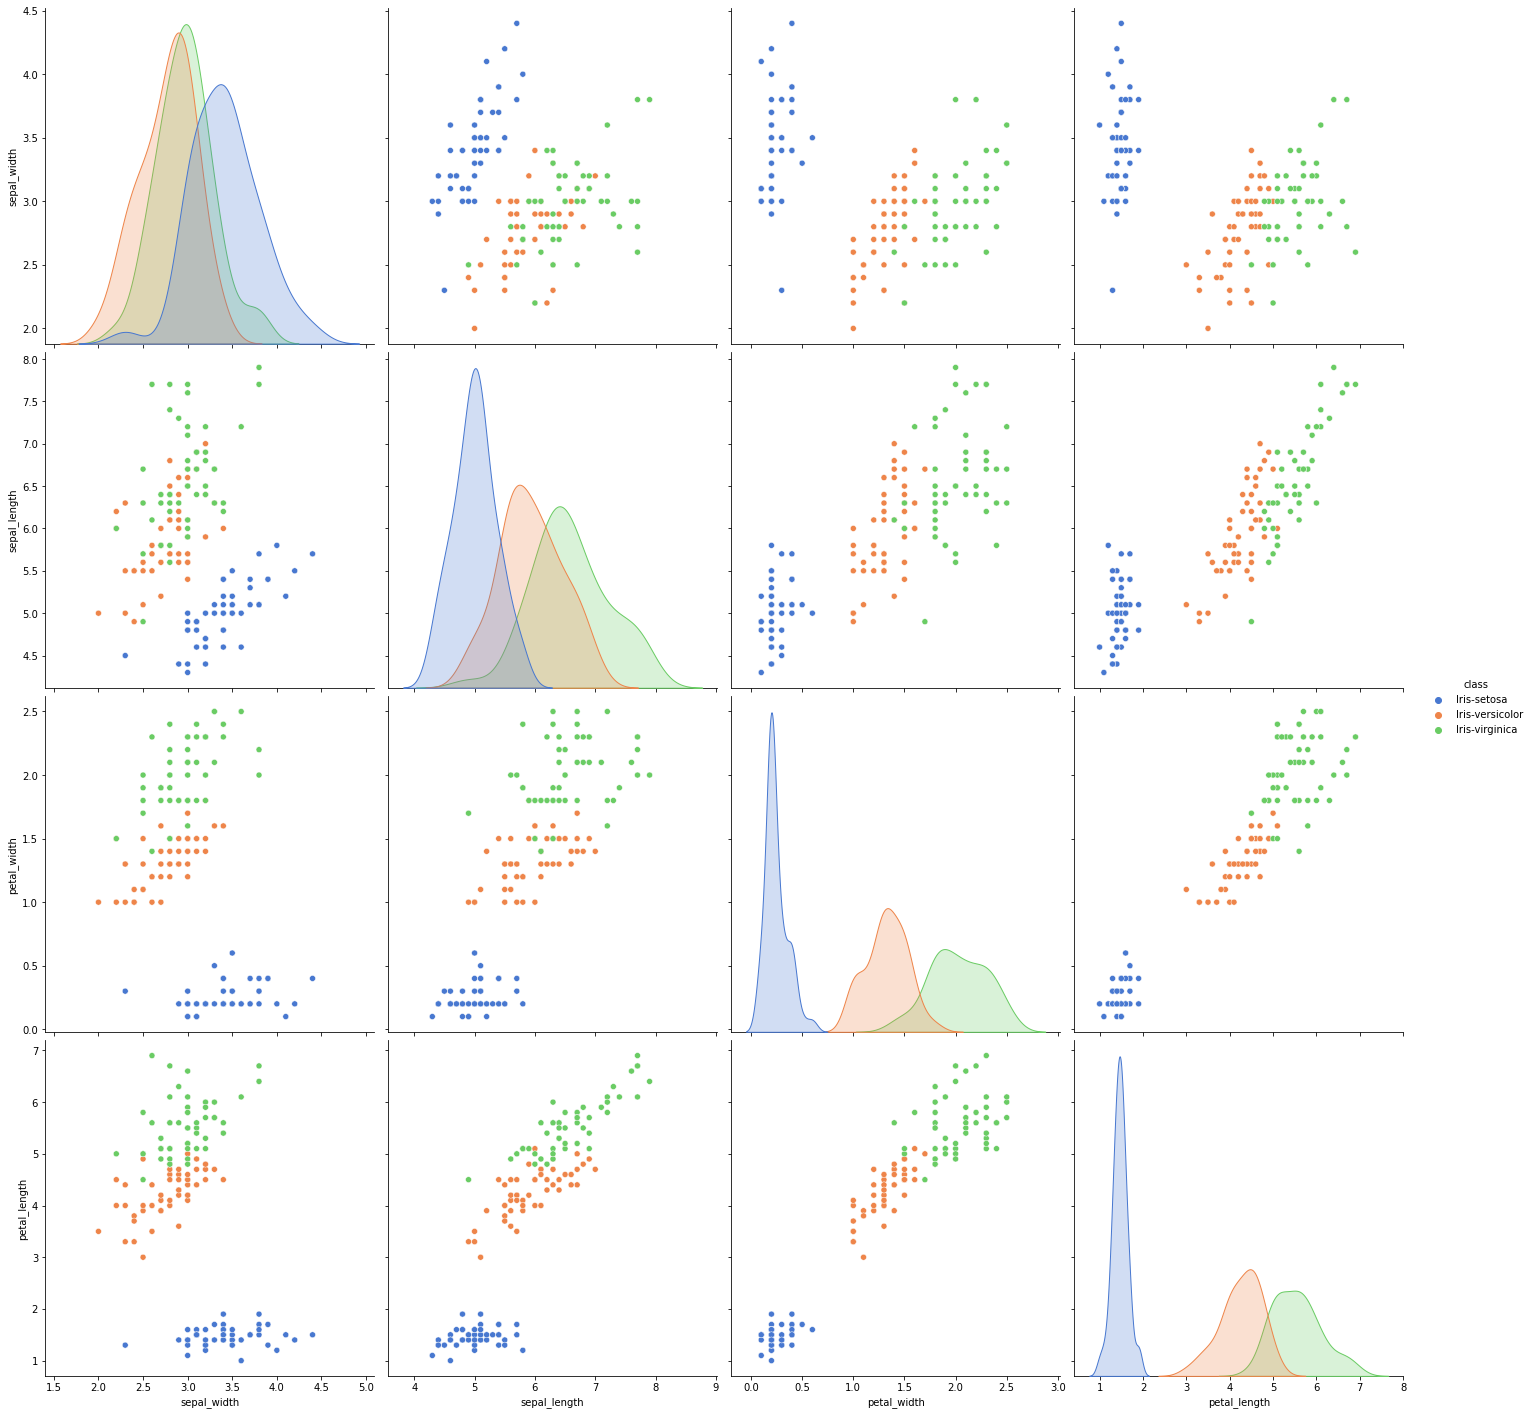

In [6]:
sns.pairplot(raw_dataset,hue='class',palette="muted",size=5,vars=['sepal_width','sepal_length','petal_width','petal_length'],kind='scatter')

<AxesSubplot:xlabel='class', ylabel='sepal_length'>

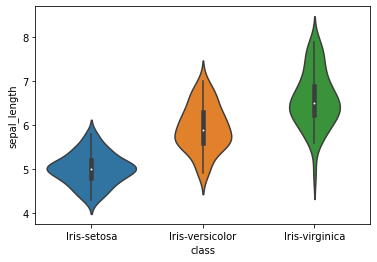

In [15]:
sns.violinplot(x='class',y='sepal_length',data=raw_dataset)

<AxesSubplot:xlabel='class', ylabel='sepal_width'>

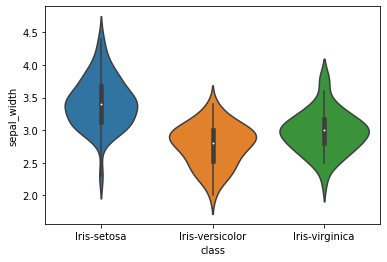

In [11]:
sns.violinplot(x='class',y='sepal_width',data=raw_dataset)

<AxesSubplot:xlabel='class', ylabel='petal_length'>

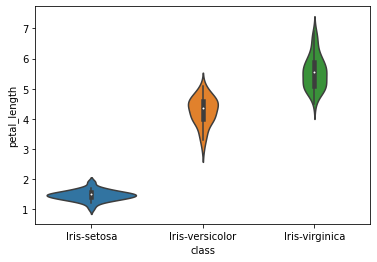

In [12]:
sns.violinplot(x='class',y='petal_length',data=raw_dataset)

<AxesSubplot:xlabel='class', ylabel='petal_width'>

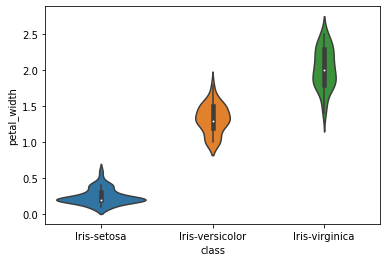

In [13]:
sns.violinplot(x='class',y='petal_width',data=raw_dataset)

In [16]:
dataset=pd.get_dummies(raw_dataset,prefix='',prefix_sep='')
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


In [17]:
train_dataset=dataset.sample(frac=.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [18]:
train_features=train_dataset[['sepal_length','sepal_width','petal_length','petal_width']]
train_labels=train_dataset[['Iris-setosa','Iris-versicolor','Iris-virginica']]

test_features=test_dataset[['sepal_length','sepal_width','petal_length','petal_width']]
test_label=test_dataset[['Iris-setosa','Iris-versicolor','Iris-virginica']]

In [19]:
train_features.shape

(120, 4)

In [215]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [21]:
normalizer=preprocessing.Normalization(input_shape=[4,])

In [22]:
normalizer.adapt(np.asarray(train_features))

In [23]:
normalizer.mean.numpy()

array([5.8233333, 3.0508332, 3.7525   , 1.2      ], dtype=float32)

In [24]:
print('original',np.asarray(train_features[:1]))
print()
print('normalized',normalizer(np.asarray(train_features[:1])).numpy())

original [[5.8 2.8 5.1 2.4]]

normalized [[-0.02827565 -0.57469636  0.7718723   1.5943413 ]]


In [260]:
model=Sequential()
model.add(normalizer)
for i in range(7):
    model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [261]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense_128 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_129 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_130 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_131 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_132 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_133 (Dense)            (None, 8)               

In [262]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [263]:
model.predict(train_features[:10])

array([[0.33743954, 0.3077102 , 0.35485026],
       [0.33598447, 0.31749582, 0.34651974],
       [0.33517992, 0.3240625 , 0.34075758],
       [0.33490837, 0.32418498, 0.34090668],
       [0.3344763 , 0.3293097 , 0.336214  ],
       [0.33408704, 0.32904053, 0.33687243],
       [0.3346952 , 0.32861507, 0.3366897 ],
       [0.33436581, 0.32741457, 0.33821967],
       [0.33483455, 0.32462966, 0.34053582],
       [0.3348019 , 0.32482564, 0.34037244]], dtype=float32)

In [264]:
history=model.fit(
    train_features,
    train_labels,
    validation_split=.2,
    epochs=200
)

88 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 65/200
96/96 [==============================] - 0s 280us/sample - loss: 0.0724 - accuracy: 0.9688 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 66/200
96/96 [==============================] - 0s 239us/sample - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 67/200
96/96 [==============================] - 0s 260us/sample - loss: 0.0648 - accuracy: 0.9792 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 68/200
96/96 [==============================] - 0s 260us/sample - loss: 0.0616 - accuracy: 0.9896 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 69/200
96/96 [==============================] - 0s 260us/sample - loss: 0.0571 - accuracy: 0.9896 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 70/200
96/96 [==============================] - 0s 218us/sample - loss: 0.0547 - accuracy: 0.9896 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 71/200
96/96 [==============================] - 0s 270us/sample - loss: 0

In [265]:
from plot_helper import plot_confusion_matrix, plt_accuracy_learning_curve, plt_loss_learning_curve

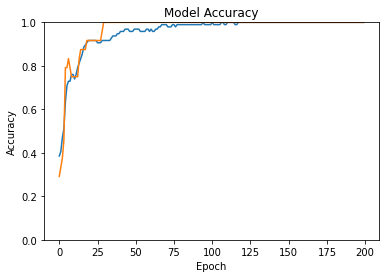

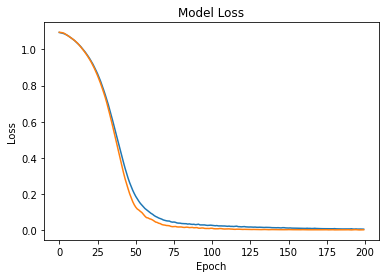

In [266]:
plt_accuracy_learning_curve(history,full_limit=True)
plt_loss_learning_curve(history)

In [267]:
predict_classes=model.predict_classes(test_features)
predict_classes=pd.Series(predict_classes)
predict_classes=predict_classes.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
predict_classes

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10    Iris-versicolor
11    Iris-versicolor
12    Iris-versicolor
13    Iris-versicolor
14     Iris-virginica
15    Iris-versicolor
16    Iris-versicolor
17    Iris-versicolor
18    Iris-versicolor
19    Iris-versicolor
20    Iris-versicolor
21     Iris-virginica
22     Iris-virginica
23     Iris-virginica
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
27     Iris-virginica
28     Iris-virginica
29     Iris-virginica
dtype: object

In [268]:
true_classes=test_label.idxmax(axis=1)
true_classes

9          Iris-setosa
14         Iris-setosa
19         Iris-setosa
21         Iris-setosa
25         Iris-setosa
29         Iris-setosa
36         Iris-setosa
39         Iris-setosa
47         Iris-setosa
49         Iris-setosa
58     Iris-versicolor
67     Iris-versicolor
70     Iris-versicolor
72     Iris-versicolor
77     Iris-versicolor
79     Iris-versicolor
81     Iris-versicolor
82     Iris-versicolor
87     Iris-versicolor
88     Iris-versicolor
99     Iris-versicolor
103     Iris-virginica
115     Iris-virginica
117     Iris-virginica
122     Iris-virginica
130     Iris-virginica
136     Iris-virginica
140     Iris-virginica
142     Iris-virginica
145     Iris-virginica
dtype: object

In [269]:
from sklearn.metrics import accuracy_score
accuracy_score(true_classes,predict_classes)

0.9666666666666667

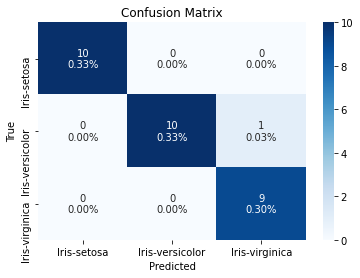

In [270]:
plot_confusion_matrix(true_classes,predict_classes,['Iris-setosa','Iris-versicolor','Iris-virginica'])

In [ ]:
model.save_weights('iris.model.h5')